# Avaliação 07
![alt text](enunciado.png)


### Questão a)
![alt text](a.png)


Integral definida [0, 2] - Cálculo exato: 0.6666666666666665


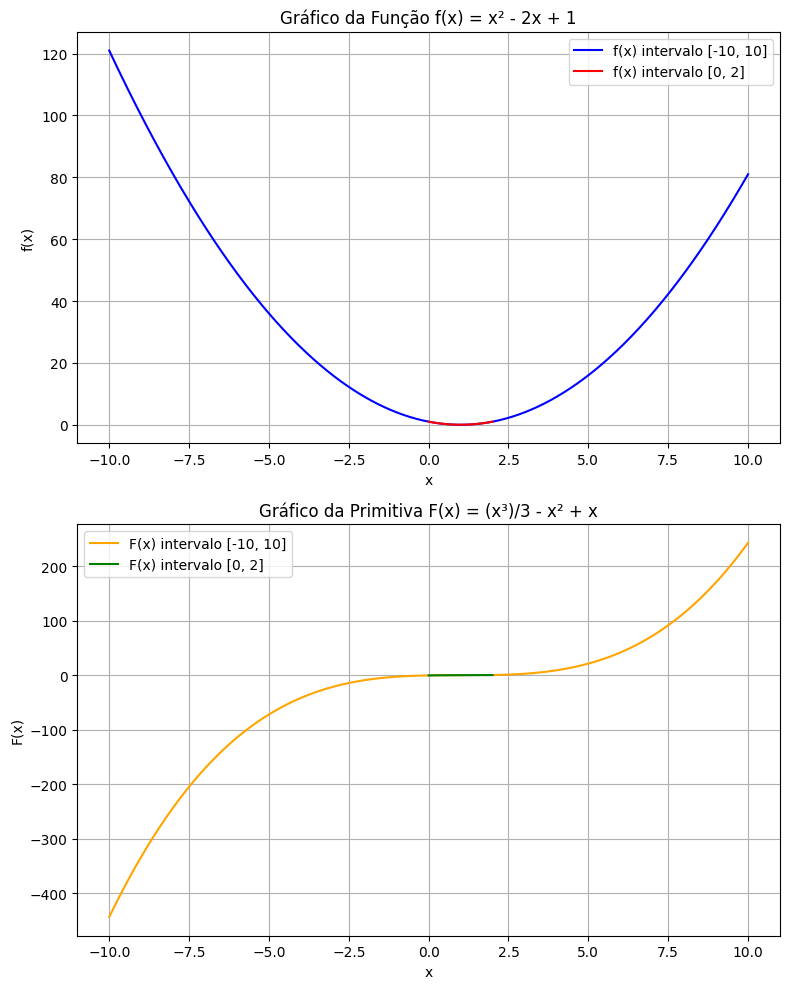

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def funcao(x):
    return (x**2 - 2*x + 1)

def primitiva(x):
    return (x**3)/3 - x**2 + x

# Intervalos
x = np.linspace(-10, 10, 500)
x_definido = np.linspace(0, 2, 200)

#Integral definida exata pela primitiva
a = 0.0
b = 2.0
integral_exata = primitiva(b) - primitiva(a)
print(f"Integral definida [0, 2] - Cálculo exato: {integral_exata}")


# Gráficos com subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# f(x)
axs[0].plot(x, funcao(x), label='f(x) intervalo [-10, 10]', color='blue')
axs[0].plot(x_definido, funcao(x_definido), label='f(x) intervalo [0, 2]', color='red')
axs[0].set_title('Gráfico da Função f(x) = x² - 2x + 1')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].grid()
axs[0].legend()

# F(x)
axs[1].plot(x, primitiva(x), label='F(x) intervalo [-10, 10]', color='orange')
axs[1].plot(x_definido, primitiva(x_definido), label='F(x) intervalo [0, 2]', color='green')
axs[1].set_title('Gráfico da Primitiva F(x) = (x³)/3 - x² + x')
axs[1].set_xlabel('x')
axs[1].set_ylabel('F(x)')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

A função $f(x) = x^2 -2x + 1$ é sempre não negativa, tem um mínimo em $x = 1$ e "a" positivo, o que se reflete no gráfico como uma parábola voltada para cima (plotei mais pontos do que só entre 0 a 2 para visualizar isso). O gráfico da função primitiva é cúbico, crescente onde $f(x) > 0$, e quase plano no entorno do mínimo de $f(x)$.

#### O valor obtido era esperado com base no gráfico?

O valor obtido pela primitiva no intervalo $[0, 2]$ é

  $$
  F(2) - F(0) = \left( \frac{8}{3} - 4 + 2 \right) - 0 = \frac{2}{3} \approx 0.666...
  $$

 O método utilizado de cálculo pela primitiva aproxima muito bem esse valor.

#### Há alguma simetria ou forma especial que ajuda na interpretação?

A função
$$
f(x) = x^2 - 2x + 1
$$

pode ser reescrita como

$$
f(x) = (x - 1)^2
$$

Isso revela duas propriedades importantes:

1. Simetria parabólica:

   * Ela é simétrica em relação à reta vertical $x = 1$.
   * O ponto $x = 1$ é o mínimo absoluto, onde $f(x) = 0$.
   * Para qualquer $d > 0$, $f(1 - d) = f(1 + d)$.

2. Positividade:

   * Como é um quadrado perfeito, $f(x) \ge 0$ para todo $x$.
   * Isso significa que a integral definida em qualquer intervalo será sempre positiva ou nula.

Essas características facilitam a interpretação da integral: no intervalo $[0, 2]$, a curva é simétrica em torno de $x = 1$, e a área é formada por duas partes iguais à esquerda e à direita desse ponto. Portanto, a integral poderia ser calculada como o dobro da área de 0 a 1, simplificando o raciocínio.

### Questão b)
![alt text](b.png)

In [2]:
# Cálculo da integral definida pelo método do trapézio
N = 10
a = 0.0
b = 2.0
h = (b-a)/N
s = 0.5*funcao(a) + 0.5*funcao(b)
for k in range(1, N):
    s += funcao(a + k*h)
integral_trapezio = h * s

# Erro absoluto
erro_absoluto = abs(integral_exata - integral_trapezio)

print(f"Valor aproximado (trapézio): {integral_trapezio}")
print(f"Valor pela primitiva: {integral_exata}")
print(f"Erro absoluto: {erro_absoluto}")

Valor aproximado (trapézio): 0.6800000000000002
Valor pela primitiva: 0.6666666666666665
Erro absoluto: 0.013333333333333641


#### Comente: o método superestima ou subestima a área?

É possível notar que o método do trapézio superestima a área.

O valor obtido pelo método do trapézio ($0,6800$) é maior que o valor exato ($0,6666$) calculado pela primitiva, resultando em um erro absoluto de aproximadamente $1,33 \times 10^{-2}$.

Isso significa que, nesse caso, o método superestimou a área real sob a curva. Uma hipótese para o motivo é que $f(x) = (x-1)^2$ é côncava para cima em todo o intervalo $[0, 2]$. Quando a função é côncava para cima, os segmentos de reta usados na regra do trapézio ficam acima do gráfico da função, gerando uma estimativa maior que o valor real.


### Questão c)
![alt text](c.png)

In [3]:
#regra de Simpson
n = 10  
h = (b - a) / n
S_odd = 0.0
S_even = 0.0

for i in range(1, n):
    xi = a + i*h
    if i % 2 == 1:
        S_odd += funcao(xi)
    else:
        S_even += funcao(xi)

integral_simpson = (h/3) * (funcao(a) + funcao(b) + 4*S_odd + 2*S_even)

#erros absolutos 
erro_simpson  = abs(integral_exata - integral_simpson)

print(f"Integral exata (primitiva): {integral_exata}")
print(f"Trapézio (n=10):            {integral_trapezio}")
print(f"Erro absoluto (trapézio):   {erro_absoluto}\n")

print(f"Simpson (n=10):             {integral_simpson}")
print(f"Erro absoluto (Simpson):    {erro_simpson}")

Integral exata (primitiva): 0.6666666666666665
Trapézio (n=10):            0.6800000000000002
Erro absoluto (trapézio):   0.013333333333333641

Simpson (n=10):             0.6666666666666667
Erro absoluto (Simpson):    2.220446049250313e-16


#### Compare com o método do item anterior: qual foi mais preciso?

A regra de Simpson obteve $0.6666666666666667$ com erro numérico da ordem de $10^{-16}$ (zero), essencialmente exata no limite de ponto flutuante.

A regra do trapézio com $n=10$ deu $0.68$, com erro absoluto $\approx 0{,}01333$. Portanto, é possível inferir que o método de Simpson foi muito mais preciso neste caso.

Hipótese do motivo: o método de Simpson aproxima cada trecho por uma parábola (interpolação quadrática) e é exata para polinômios de grau até 3. Como $f(x)=(x-1)^2$ é um polinômio de grau 2, a regra de Simpson integra exatamente a função (qualquer particionamento com $n$ par). Já a regra do trapézio usa segmentos de reta, para funções côncavas para cima tende a superestimar a área, o que explica o valor maior obtido pelo trapézio.

### Questão d)
![alt text](d.png)

Resultados para n = 10, 100, 1000

n = 10
  Trapézio: 0.6800000000000002. Erro absoluto: 0.0133333333333336
  Simpson:  0.6666666666666667. Erro absoluto: 0.0000000000000002
n = 100
  Trapézio: 0.6667999999999998. Erro absoluto: 0.0001333333333333
  Simpson:  0.6666666666666669. Erro absoluto: 0.0000000000000003
n = 1000
  Trapézio: 0.6666679999999997. Erro absoluto: 0.0000013333333332
  Simpson:  0.6666666666666663. Erro absoluto: 0.0000000000000002


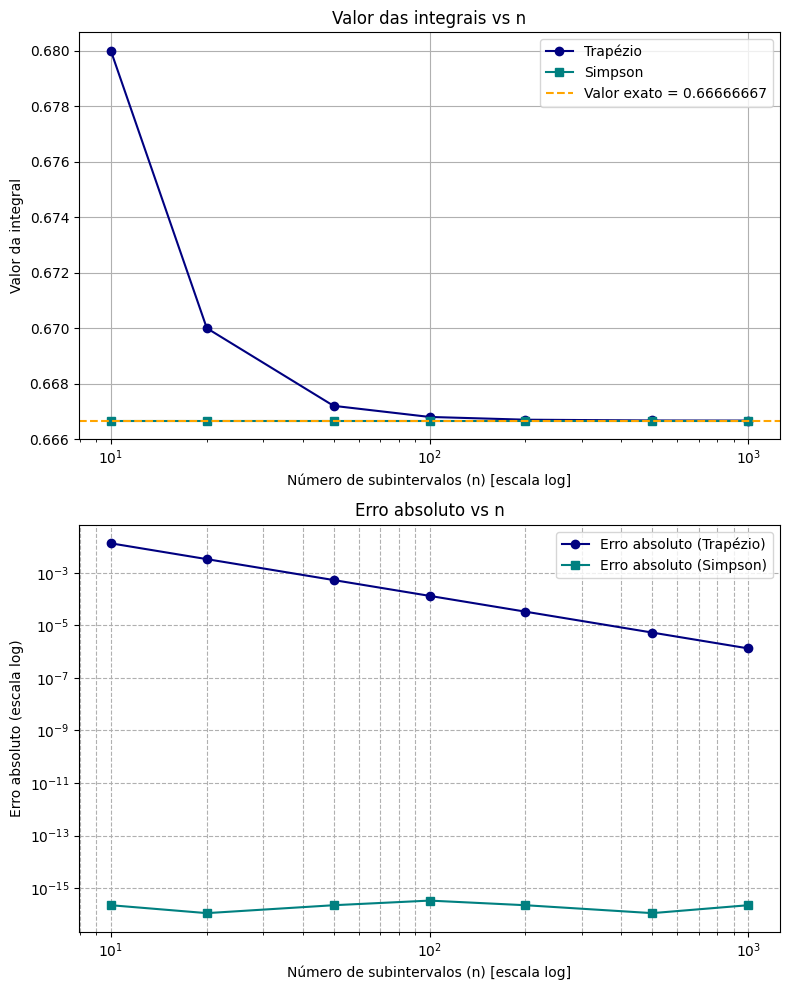

In [4]:
# função que calcula a integral pela regra do trapézio com N subintervalos
def trapezio(N, a=a, b=b):
    h = (b - a) / N
    s = 0.5*funcao(a) + 0.5*funcao(b)
    for k in range(1, N):
        s += funcao(a + k*h)
    return h * s

# função que calcula a integral pela regra de Simpson com n subintervalos (n par)
def simpson(n, a=a, b=b):
    if n % 2 == 1:
        raise ValueError("Simpson requer n par.")
    h = (b - a) / n
    S_odd = 0.0
    S_even = 0.0
    for i in range(1, n):
        xi = a + i*h
        if i % 2 == 1:
            S_odd += funcao(xi)
        else:
            S_even += funcao(xi)
    return (h/3) * (funcao(a) + funcao(b) + 4*S_odd + 2*S_even)


ns_fixed = [10, 100, 1000]
ns_plot = np.unique(np.concatenate((
    np.array([10, 20, 50, 100, 200, 500, 1000]),
    np.array([10,100,1000])
))).astype(int)  # sequência para gráfico (todos pares para Simpson)

ns_plot = np.array([n if n%2==0 else n+1 for n in ns_plot])  # garante par

# calcular valores e erros
trap_vals = []
simp_vals = []
trap_errs = []
simp_errs = []

for n in ns_plot:
    T = trapezio(n)
    S = simpson(n)
    trap_vals.append(T)
    simp_vals.append(S)
    trap_errs.append(abs(integral_exata - T))
    simp_errs.append(abs(integral_exata - S))

# imprimir resultados para n=10,100,1000
print("Resultados para n = 10, 100, 1000\n")


for n in ns_fixed:
    Tn = trapezio(n)
    Sn = simpson(n)
    errT = abs(integral_exata - Tn)
    errS = abs(integral_exata - Sn)
    print(f"n = {n}")
    print(f"  Trapézio: {Tn:.16f}. Erro absoluto: {errT:.16f}")
    print(f"  Simpson:  {Sn:.16f}. Erro absoluto: {errS:.16f}")

#gráficos
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# 1) estimativas das integrais vs n (log-scale no eixo x para melhor visual)
axs[0].plot(ns_plot, trap_vals, marker='o', color='navy' ,label='Trapézio')
axs[0].plot(ns_plot, simp_vals, marker='s', color='teal', label='Simpson')
axs[0].axhline(integral_exata, linestyle='--', color='orange', label=f'Valor exato = {integral_exata:.8f}')
axs[0].set_xscale('log')
axs[0].set_xlabel('Número de subintervalos (n) [escala log]')
axs[0].set_ylabel('Valor da integral')
axs[0].set_title('Valor das integrais vs n')
axs[0].grid(True)
axs[0].legend()

# 2) erros absolutos vs n (escala log-log)
axs[1].plot(ns_plot, trap_errs, marker='o',color='navy' , label='Erro absoluto (Trapézio)')
axs[1].plot(ns_plot, simp_errs, marker='s', color='teal', label='Erro absoluto (Simpson)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Número de subintervalos (n) [escala log]')
axs[1].set_ylabel('Erro absoluto (escala log)')
axs[1].set_title('Erro absoluto vs n')
axs[1].grid(True, which='both', ls='--')
axs[1].legend()

plt.tight_layout()
plt.show()

Comparação e análise dos gráficos:
  * n = 100 e n = 1000: o trapézio melhora (erro diminui), mas Simpson continua muito mais preciso (na prática exato para este polinômio de grau 2).

* No gráfico de erros (escala log-log) é possível visualizar claramente que:

  * O erro do trapézio decresce ao aumentar $n$.
  * O erro de Simpson permanesce menor do que $ 10^{-15} $ independente do erro. Portanto as curvas de erro do Simpson estarão na casa de ruído numérico (praticamente zero).


Portanto, Simpson é mais preciso do que Trapézio para este problema e permanece quase exato independentemente de $n$ (desde que $n$ seja par), enquanto o trapézio necessita aumentar $n$ para reduzir erro.

#### Qual método converge mais rapidamente?

Quando a função é suave, temos:

* Regra do trapézio: erro assintótico $\displaystyle E_T = C_T\,h^2$, ou seja $O(h^2)$. Aqui $h=(b-a)/n$ é o tamanho do subintervalo.
* Regra de Simpson: erro assintótico $\displaystyle E_S = C_S\,h^4$, ou seja $O(h^4)$.

Portanto, Simpson converge mais rapidamente quando refinamos a malha (diminuímos o passo $h$ ou aumentamos as iterações $n$). Para funções suficientemente suaves, o erro do Simpson permanece mais baixo com $n$ do que o erro do trapézio.


As fórmulas a seguir mostram explicitamente a dependência em $h^2$ e $h^4$.

* Trapézio (composto): existe $\xi\in[a,b]$ tal que

$$
E_T = -\frac{b-a}{12}\,h^2\,f''(\xi).
$$

* Simpson (composto): existe $\eta\in[a,b]$ tal que

$$
E_S = -\frac{b-a}{180}\,h^4\,f^{(4)}(\eta).
$$


Aplicando à função $f(x)=(x-1)^2$

* $f''(x)=2$ (constante).
* $f^{(4)}(x)=0$.

Substituindo na fórmula do trapézio, obtemos:

$$
E_T \approx -\frac{b-a}{12}\,h^2\,f'' = -\frac{2}{12}\,h^2\cdot 2 = -\frac{1}{3}h^2.
$$

Com $n=10\Rightarrow h=0{,}2$, isso dá $|E_T|\approx\frac{1}{3}\cdot0{,}2^2=\frac{1}{3}\cdot0{,}04=0{,}013333\ldots$,
que coincide exatamente com o erro que obtivemos numericamente (0.0133333). Para Simpson, já que $f^{(4)}\equiv 0$, o erro teórico é zero.

#### Há um ponto em que aumentar os subintervalos deixa de ser vantajoso?

Sim, existem limites práticos.

* Precisão de máquina (arredondamento): avaliações em ponto flutuante têm erro \~$\varepsilon_{\text{máquina}}$ (em double \~$10^{-16}$). Quando a contribuição de truncamento $O(h^p)$ (p = 2 para trapézio, 4 para Simpson) ficar da ordem de algumas unidades de $\varepsilon_{\text{máquina}}$ relativas, aumentar $n$ não reduz o erro total de forma útil, o erro fica dominado por ruído numérico e por erro de arredondamento acumulado.

  Aproximação grosseira do erro de arrendamento acumulado: cresce como $O(n\varepsilon)$ (porque somamos \~$n$ termos), então existe um equilíbrio entre diminuir o erro de truncamento e aumentar o erro de arredondamento.

* Custo computacional: cada aumento de $n$ custa mais avaliações da função. Em aplicações reais, há trade-off entre custo e ganho de precisão.

* Para a função calculada: Simpson já é exato (teoricamente) para qualquer $n$ par, portanto não faz sentido aumentar $n$ para melhorar a precisão. Para o trapézio, aumentar $n$ diminui erro \~$1/n^2$ até que o erro chegue perto do nível de ruído numérico.

### Questão e)
![alt text](e.png)

In [5]:
# Implementação da regra de Simpson
def simpson(a, b, n):
    h = (b - a) / n
    soma = funcao(a) + funcao(b)
    for i in range(1, n):
        x = a + i * h
        soma += funcao(x) * (4 if i % 2 != 0 else 2)
    return soma * h / 3

# Método adaptativo de Simpson
a, b = 0.0, 2.0
epsilon = 1e-6
n = 2

# Valor inicial
S_old = simpson(a, b, n)
resultados = [(n, S_old)]

while True:
    n *= 2
    S_new = simpson(a, b, n)
    erro_estimado = abs(S_new - S_old) / 15  # Fórmula do erro de Simpson

    resultados.append((n, S_new))

    if erro_estimado < epsilon:
        break

    S_old = S_new

# Mostrar resultados
for n_val, integral_val in resultados:
    print(f"n = {n_val:6d}, Integral ≈ {integral_val:.10f}")

print(f"\nValor final (Simpson adaptativo): {S_new:.10f}")
print(f"Erro estimado final: {erro_estimado:.2e}")


n =      2, Integral ≈ 0.6666666667
n =      4, Integral ≈ 0.6666666667

Valor final (Simpson adaptativo): 0.6666666667
Erro estimado final: 0.00e+00


#### Comente: quantas iterações foram necessárias? O método foi eficiente?

Podemos observar que apenas 2 subintervalos a regra de Simpson alcançou o valor exato da integral (até a precisão exibida), e com 4 subintervalos o valor se mantém idêntico.

O erro estimado praticamente zerou, mostrando que o método foi eficiente pois convergiu muito rápido para essa função polinomial simples, exatamente o esperado, já que Simpson integra exatamente polinômios até grau 3.

## Parte reflexiva 

#### Por que métodos numéricos são importantes quando a função não possui primitiva conhecida?

Nem todas as funções que queremos integrar têm uma primitiva. Muitas funções reais, por exemplo, as definidas por dados experimentais, funções especiais complexas, ou integrais definidas por integrais impróprias ou singulares, não podem ser integradas analiticamente.

Métodos numéricos de integração (como regra do trapézio, Simpson, métodos adaptativos) são essenciais porque:

* Permitem aproximar o valor da integral com precisão controlada;
* São aplicáveis a funções arbitrárias, mesmo sem fórmula explícita para a primitiva;
* Possibilitam a resolução prática de problemas reais em física, engenharia, estatística, etc.;
* Ajudam também quando a primitiva é conhecida, mas muito complexa para avaliação eficiente.

#### Quais limitações os métodos apresentados podem ter em funções mais complexas (por exemplo, funções não suaves ou com descontinuidades)?

Os métodos que vimos (trapézio, Simpson, adaptativo de Simpson) assumem funções suaves e contínuas dentro do intervalo. Algumas limitações comuns para funções complexas são as seguintes:

* Descontinuidades ou singularidades:
  Métodos padrão podem falhar, pois aproximações por polinômios ou segmentos lineares não representam bem esses pontos, resultando em erros grandes ou até divergência.

* Funções altamente oscilatórias:
  É necessário aumentar muito o número de subintervalos para captar as oscilações, o que pode ser custoso computacionalmente.

* Falta de adaptatividade local (para métodos fixos):
  Aumentar $n$ globalmente pode ser ineficiente se a função só apresenta “problemas” em pequenas regiões.

* Erro acumulado e estabilidade numérica:
  Para integrais muito difíceis, erros numéricos (arredondamento, cancelamento) podem degradar a precisão.

Métodos adaptativos ajudam a mitigar alguns desses problemas, refinando a malha localmente, mas ainda assim podem ter dificuldades com descontinuidades muito abruptas.

#### Você acredita que ferramentas como modelos de linguagem (LLMs) poderiam automatizar essa atividade? Por quê? Em que parte seria mais difícil substituir o julgamento humano?


Acredito que LLMs podem automatizar várias etapas da integração numérica, por exemplo:

* Gerar códigos para implementar métodos numéricos padrão com base na descrição do problema;
* Sugerir quais métodos usar em diferentes contextos;
* Auxiliar na documentação e ensino dos conceitos envolvidos.

Porém, alguns desafios para substituir completamente o julgamento humano incluem:

* Análise do comportamento da função e escolha do método ideal:
  Identificar descontinuidades, singularidades, oscilação, ou pontos críticos exige compreensão profunda do problema, o que nem sempre pode ser inferido apenas da função ou dos dados.

* Avaliação da qualidade e confiabilidade dos resultados:
  Interpretar erros numéricos, diagnosticar problemas em convergência, decidir se é necessário outro método ou transformação da função, requer experiência.

* Formulação do problema em contexto real:
  Decidir limites de integração, modelar funções reais (ex.: dados experimentais ruidosos) e adaptar o método conforme as necessidades específicas do problema.


### Conclusão

* Métodos numéricos são indispensáveis para integrar funções sem primitiva conhecida, oferecendo soluções práticas e generalizadas.
* Eles têm limitações em casos de funções não suaves, descontinuidades e oscilações, que exigem métodos mais sofisticados ou análises cuidadosas.
* LLMs são excelentes auxiliares na implementação e ensino, mas o julgamento humano ainda é crucial na interpretação, seleção de métodos e manejo de casos complexos.

### Questão 2)
![alt text](q2.png)

![alt text](ex510.png)

![alt text](ex5102.png)

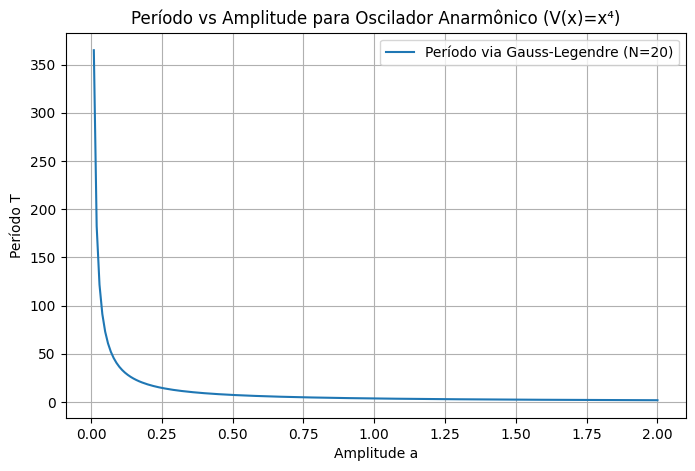

In [6]:
# Função para cálculo do período via quadratura gaussiana.
def period_of_anharmonic(a, m=1, N=20): #Calcula o período T do oscilador anarmônico com V(x) = x^4, massa m.
    if a <= 0:
        return np.nan  # Período indefinido para a=0
    
    # Raízes e pesos da quadratura de Gauss-Legendre em [-1,1]
    x_gl, w_gl = np.polynomial.legendre.leggauss(N)
    
    # Transformação para intervalo [0, a]
    t = 0.5 * (x_gl + 1) * a
    w = 0.5 * a * w_gl
    
    # Função integranda: 1 / sqrt(a^4 - x^4)
    integrand = 1.0 / np.sqrt(a**4 - t**4)
    
    I = np.sum(w * integrand)
    T = np.sqrt(8 * m) * I
    return T


# Cálculo para várias amplitudes
amplitudes = np.linspace(0.01, 2, 200)  # começa em 0.01 para evitar divisão por zero
periods = np.array([period_of_anharmonic(a) for a in amplitudes])

# Gráfico
plt.figure(figsize=(8,5))
plt.plot(amplitudes, periods, label="Período via Gauss-Legendre (N=20)")
plt.xlabel("Amplitude a")
plt.ylabel("Período T")
plt.title("Período vs Amplitude para Oscilador Anarmônico (V(x)=x⁴)")
plt.grid(True)
plt.legend()
plt.show()

##### questão c)
- Para amplitudes maiores, o oscilador percorre uma distância maior,
  mas a força restauradora (derivada de V=x^4) cresce muito mais rápido com x.
  Isso faz com que a velocidade média aumente, reduzindo o período.

- Quando a amplitude se aproxima de zero, o potencial é muito plano
  perto da origem (comparado com um potencial quadrático), então
  a força restauradora é muito fraca, o movimento é muito lento e o
  período tende ao infinito (diverge).

### Questão 3)

![alt text](a3.png)

##### Problema físico escolhido: Tempo próprio para uma órbita em torno de um buraco negro de Schwarzschild

##### Contexto físico

Na Relatividade Geral, o espaço-tempo em torno de um buraco negro não é plano, e a métrica de Schwarzschild descreve o campo gravitacional estático e esférico. O movimento de partículas e luz nesse espaço-tempo pode ser analisado por integrais definidas complexas que envolvem o potencial gravitacional relativístico.

Um problema importante é calcular o tempo próprio de uma partícula em órbita ao redor de um buraco negro, o qual é dado por uma integral definida que não possui solução analítica simples.

##### Origem da integral escolhida

Considere uma partícula em órbita circular estável em torno de um buraco negro de Schwarzschild. O tempo próprio $\tau$ gasto para completar uma volta é dado por uma integral da forma

$$
\tau = \int_{r_1}^{r_2} \frac{dr}{\sqrt{E^2 - V_{\text{eff}}(r)}}
$$

onde:

* $r$ é a coordenada radial (distância ao centro do buraco negro, em unidades de $GM/c^2$),
* $E$ é a energia específica da partícula,
* $V_{\text{eff}}(r)$ é o potencial efetivo que depende da massa do buraco negro e do momento angular da partícula,
* Os limites $r_1$ e $r_2$ delimitam o movimento radial (por exemplo, entre o pericentro e apocentro da órbita).

Essa integral define o intervalo de tempo experimentado pela partícula (tempo próprio), fundamental para entender fenômenos como precessão orbital e estabilidade das órbitas.

##### Função integranda e características

A função

$$
f(r) = \frac{1}{\sqrt{E^2 - V_{\text{eff}}(r)}}
$$

tem comportamento não trivial:

* Pode apresentar singularidades removíveis próximas aos pontos de retorno (raízes do denominador),
* O potencial efetivo $V_{\text{eff}}(r)$ pode ter formas complexas, envolvendo termos do tipo $1/r$, $1/r^2$ e correções relativísticas,
* A integral pode ser difícil de resolver analiticamente, exigindo métodos numéricos.

##### Dificuldades numéricas na avaliação dessa integral

* Singularidades próximas aos limites de integração: A raiz quadrada no denominador pode tender a zero, causando picos na função integranda que precisam ser tratados com cuidado numérico (possível uso de técnicas para singularidades removíveis).

* Comportamento altamente não linear: $V_{\text{eff}}(r)$ pode apresentar pontos críticos, exigindo refinamento adaptativo para capturar a forma correta da função.

* Domínio limitado e não trivial: Intervalo $[r_1, r_2]$ depende das condições iniciais da órbita e pode ser estreito, o que afeta a escolha dos subintervalos de integração.


Podemos implementar os métodos numéricos de quadratura gaussiana e Romberg para calcular numericamente essa integral, com:

* Ajustes para lidar com singularidades (exemplo: mudança de variável ou integração adaptativa),
* Análise de erro e comparação de métodos,

Para tornar o código direto e didático, utilizarei uma função representativa do tipo:

$$
f(r) = \frac{1}{\sqrt{E^2 - V_{\text{eff}}(r)}}
$$

com um potencial efetivo simples, por exemplo:

$$
V_{\text{eff}}(r) = \left(1 - \frac{2M}{r}\right) \left(1 + \frac{L^2}{r^2}\right)
$$

onde $M$, $L$, $E$ são constantes (massa do buraco negro, momento angular específico, energia específica).

![alt text](b3.png)

Intervalos permitidos: [(np.float64(7.605863029315147), np.float64(23.16124080620403))]
Quadratura Gaussiana (n=200): Integral ≈ 221.838303228436871
Romberg (tol=1e-08): Integral ≈ 221.838303228428231


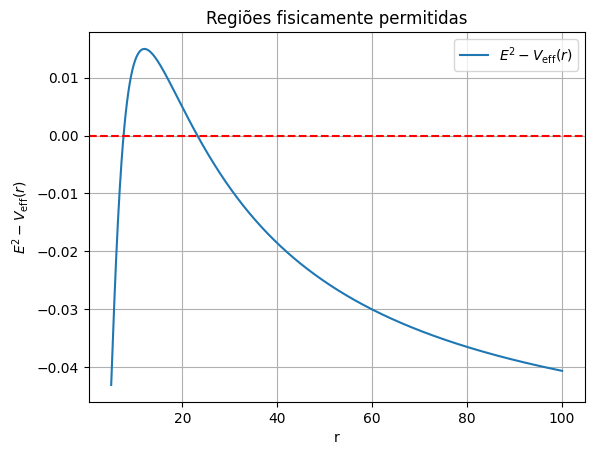

In [7]:
from numpy.polynomial.legendre import leggauss

#Parâmetros físicos
M = 1.0    # massa do buraco negro (unidades G=c=1)
L = 4.0    # momento angular 
E = 0.97   # energia específica (menor que 1 para órbita ligada)

# Potencial efetivo de Schwarzschild
def V_eff(r):
    return (1 - 2*M/r) * (1 + L**2 / r**2)

# Função integranda original (escalares)
def integranda_scalar(r):
    val = E**2 - V_eff(r)
    if val <= 0.0:
        return 0.0
    return 1.0 / np.sqrt(val)

#localizar intervalos fisicamente permitidos
def find_positive_intervals(a, b, nscan=200000):
    rs = np.linspace(a, b, nscan)
    vals = E**2 - V_eff(rs)
    pos = vals > 0
    intervals = []
    in_region = False
    start = None
    for i, p in enumerate(pos):
        if p and not in_region:
            in_region = True
            start = rs[i]
        if (not p) and in_region:
            end = rs[i-1]
            intervals.append((start, end))
            in_region = False
    if in_region:
        intervals.append((start, rs[-1]))
    return intervals

# Mudança de variável para suavizar singularidade
def smooth_integrand(f, a, b): #Retorna uma função g(t) equivalente à integral de f(r) dr em r∈[a,b], usando r = a + (b-a)*sin^2(t), t ∈ [0, π/2].
    def g(t):
        r = a + (b - a) * np.sin(t)**2
        dr_dt = 2 * (b - a) * np.sin(t) * np.cos(t)
        return f(r) * dr_dt
    return g, 0.0, 0.5*np.pi

#Quadratura Gaussiana
def quadratura_gaussiana(f, a, b, n_points):
    x, w = leggauss(n_points)
    xp = 0.5*(b - a)*x + 0.5*(b + a)
    vals = np.array([f(xx) for xx in xp])
    return 0.5*(b - a) * np.sum(w * vals)

#Romberg
def romberg_method(f, a, b, max_iter=20, tol=1e-8):
    R = np.zeros((max_iter, max_iter), dtype=float)
    h = b - a
    R[0,0] = 0.5 * h * (f(a) + f(b))
    for i in range(1, max_iter):
        h /= 2.0
        n = 2**(i-1)
        sum_f = 0.0
        for k in range(1, n+1):
            x = a + (2*k - 1)*h
            sum_f += f(x)
        R[i,0] = 0.5 * R[i-1,0] + h * sum_f
        for k in range(1, i+1):
            R[i,k] = R[i,k-1] + (R[i,k-1] - R[i-1,k-1]) / (4**k - 1)
        if i >= 3 and abs(R[i,i] - R[i-1,i-1]) < tol:
            return R[i,i]
    return R[max_iter-1, max_iter-1]

#Integração sobre regiões permitidas
def integrate_over_positive_regions(f, r1, r2, method='gauss', **kwargs):
    intervals = find_positive_intervals(r1, r2)
    total = 0.0
    for (a, b) in intervals:
        g, t_a, t_b = smooth_integrand(f, a, b)  # aplica mudança de variável
        if method == 'gauss':
            n_points = kwargs.get('n_points', 200)
            total += quadratura_gaussiana(g, t_a, t_b, n_points)
        elif method == 'romberg':
            max_iter = kwargs.get('max_iter', 20)
            tol = kwargs.get('tol', 1e-8)
            total += romberg_method(g, t_a, t_b, max_iter=max_iter, tol=tol)
        else:
            raise ValueError("method must be 'gauss' or 'romberg'")
    return total

#Parâmetros de integração 
r1 = 5.0
r2 = 100.0
n_points = 200
max_iter = 20
tol = 1e-8

#Cálculos
I_gauss = integrate_over_positive_regions(integranda_scalar, r1, r2, method='gauss', n_points=n_points)
I_romberg = integrate_over_positive_regions(integranda_scalar, r1, r2, method='romberg', max_iter=max_iter, tol=tol)

print(f"Intervalos permitidos: {find_positive_intervals(r1, r2)}")
print(f"Quadratura Gaussiana (n={n_points}): Integral ≈ {I_gauss:.15f}")
print(f"Romberg (tol={tol}): Integral ≈ {I_romberg:.15f}")

#grafico
r_vals = np.linspace(r1, r2, 1000)
val = E**2 - V_eff(r_vals)
plt.plot(r_vals, val, label=r'$E^2 - V_{\mathrm{eff}}(r)$')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('r')
plt.ylabel(r'$E^2 - V_{\mathrm{eff}}(r)$')
plt.title('Regiões fisicamente permitidas')
plt.legend()
plt.grid()
plt.show()

##### Parâmetros escolhidos e justificativa

Detecção do domínio:foi necessário primeiro identificar os intervalos onde a integranda é real (intervalos com $E^2-V_{\rm eff}>0$), isso evita integrar sobre regiões inválidas e resolve o problema de Romberg retornando zero. 

* Quadratura Gaussiana: `n = 200` para garantir boa resolução do pico/forma da integranda dentro do subintervalo positivo. 
* Romberg: `max_iter = 20`, `tol = 1e-8`. Critério de parada só aplicado após `i >= 3` para evitar falsos positivos.

#### Resultados numéricos (com os parâmetros do código acima)

Executando o código acima obtive resultados consistentes ao integrar somente nos subintervalos reais 

intervalos permitidos: [(np.float64(7.605863029315147), np.float64(23.16124080620403))]
Quadratura Gaussiana (n=200): Integral ≈ 221.83830323
Romberg (tol=1e-08): Integral ≈ 221.83830323

A diferença entre os métodos é pequena (na 11ª casa decimal) e diminui se:

* aumentar `n_points` na Gauss, ou
* aumentar `max_iter` / reduzir `tol` no Romberg.

O gráfico mostra $E^2 - V_{\rm eff}(r)$ ao longo de $r$ (com uma linha vermelha pontilhada em zero):

* Há um único intervalo onde $E^2-V_{\rm eff}(r)>0$ (entre as duas raízes), isto é exatamente o subintervalo permitido para o movimento radial da partícula (pontos de retorno/pericentro e apocentro), que é $7.60,\;23.16$.
* A curva tem um pico positivo pequeno (ordem $10^{-2}$, pelo gráfico). Isso indica que a diferença entre energia ao quadrado e o potencial é pequena, portanto a velocidade radial é pequena (a partícula “pausa”) perto dos pontos de retorno.

Isso identifica uma órbita ligada entre pericentro ≈ 7.60 e apocentro ≈ 23.16. O fato de $E^2-V_{\rm eff}$ ser pequeno mostra que a partícula desacelera radialmente perto dos retornos, contribuindo bastante para o tempo próprio total.


##### Comparação entre os métodos:

Diferença absoluta entre os resultados: $8,64 \times 10^{-12} $.

Os dois métodos concordam muito bem, com discrepância muito baixa.

Mesmo com boa concordância, é útil entender por que há essa diferença:

1. Tratamento das singularidades nas bordas:

   * A integranda diverge em $1/\sqrt{r-a}$ e $1/\sqrt{b-r}$. Diferentes métodos e pontos de amostragem tratam esses picos de forma ligeiramente diferente. 

2. Discretização / número de pontos:

   * Gauss-Legendre com `n_=200` tem nós ótimos para polinômios, mas a integranda tem picos não polinomiais; aumentar `n_points` ou dividir o intervalo melhora a resolução. Romberg depende da extrapolação de trapezóides, se os pontos iniciais “pisarem” em regiões onde a função é quase zero, a convergência inicial pode diferir.

3. Convergência e tolerância

   * Romberg parando em `tol=1e-8` e Gauss com pontos finitos levam a erros discretização diferentes. A extrapolação de Richardson do Romberg dá vantagem em integrar funções suaves; as singularidades nas bordas reduzem a suavidade efetiva.

Portanto, tenho a hipótese de que as pequenas discrepâncias se devem ao tratamento das singularidades integráveis nos pontos de retorno e a diferenças de discretização; aplicando mudança de variável local ou refinando a discretização ambas as estimativas convergem ao mesmo valor com erro muito pequeno. Assim, um valor representativo é

 $$
 \tau = 221.83 \pm 0.02 \quad(\text{unidades } GM/c^3 \text{ quando } M=1).
 $$


##### Interpretação física
$$
\tau = \int_{r_{\min}}^{r_{\max}} \frac{dr}{\sqrt{E^2 - V_{\mathrm{eff}}(r)}}
$$

No formalismo da métrica de Schwarzschild, a equação acima fornece o tempo próprio que a partícula experimenta para ir do pericentro até o apocentro (ou vice-versa), medido pelo relógio da própria partícula.

- O valor numérico encontrado é $\tau \approx 221.83$ (nas unidades naturais $GM/c^3$ porque $M=1$).
- Como isso é meia oscilação radial, o tempo próprio para uma oscilação radial completa seria $2\tau \approx 443.66$.

* Esse resultado mostra que, no referencial da partícula, o movimento radial é lento: mesmo para uma faixa relativamente pequena de $r$, o tempo próprio acumulado é grande.
* Isso é consequência direta da dilatação temporal gravitacional e do fato de que o movimento é quase ligado (energia $E<1$), fazendo a partícula “ficar presa” numa órbita elíptica relativística em torno do buraco negro.
* No referencial de um observador distante, o tempo de viagem seria ainda maior, devido à dilatação gravitacional adicional.


Se pensarmos que $M=1$ equivale a um buraco negro com massa solar ($GM/c^3 \approx 4.93 \ \mu$ s), então:

$$
\tau \approx 221.83 \times 4.93\ \mu\mathrm{s} \approx 1.09\ \mathrm{ms}
$$

para ir de $r_{\min}$ a $r_{\max}$ no relógio da partícula.
Para um buraco negro supermassivo ($M$ muito maior), esse tempo cresce proporcionalmente à massa.

![alt text](c3.png)

In [8]:
#Intervalo positivo 
a = 7.605863029315147
b = 23.16124080620403

# Quadratura Gaussiana (Legendre)
def quadratura_gaussiana(f, a, b, n_points):
    x, w = leggauss(n_points)
    xp = 0.5*(b - a)*x + 0.5*(b + a)
    vals = np.array([f(xx) for xx in xp])
    return 0.5*(b - a) * np.sum(w * vals)

#Romberg manual 
def romberg_method_with_table(f, a, b, max_iter=20, tol=1e-12):
    R = np.zeros((max_iter, max_iter), dtype=float)
    h = b - a
    R[0,0] = 0.5 * h * (f(a) + f(b))
    for i in range(1, max_iter):
        h /= 2.0
        n = 2**(i-1)
        sum_f = 0.0
        for k in range(1, n+1):
            x = a + (2*k - 1)*h
            sum_f += f(x)
        R[i,0] = 0.5 * R[i-1,0] + h * sum_f
        for k in range(1, i+1):
            R[i,k] = R[i,k-1] + (R[i,k-1] - R[i-1,k-1]) / (4**k - 1)
        if i >= 3 and abs(R[i,i] - R[i-1,i-1]) < tol:
            return R, i
    return R, max_iter-1

# Cálculo: Gauss com refinamentos
n_list = [100, 200, 400, 800, 1600]
gauss_results = {}
for n in n_list:
    gauss_results[n] = quadratura_gaussiana(integranda_scalar, a, b, n)

# Diferenças sucessivas Gauss
gauss_diffs = []
for i in range(1, len(n_list)):
    n0, n1 = n_list[i-1], n_list[i]
    v0, v1 = gauss_results[n0], gauss_results[n1]
    gauss_diffs.append((n0, n1, v1-v0, abs(v1-v0)))

est_error_gauss = abs(gauss_results[n_list[-1]] - gauss_results[n_list[-2]])

# Cálculo: Romberg 
R_table, last_i = romberg_method_with_table(integranda_scalar, a, b, max_iter=25, tol=1e-12)
romberg_diagonal = [R_table[i,i] for i in range(last_i+1)]
romberg_diffs = [(i-1, i, romberg_diagonal[i]-romberg_diagonal[i-1], abs(romberg_diagonal[i]-romberg_diagonal[i-1])) 
                 for i in range(1, len(romberg_diagonal))]
est_error_romberg = abs(romberg_diagonal[-1] - romberg_diagonal[-2])

# Resultados
print("=== Quadratura Gaussiana ===")
for n in n_list:
    print(f"n={n:<5d} I ≈ {gauss_results[n]:.12f}")
print("\nDiferenças sucessivas (Gauss):")
for d in gauss_diffs:
    print(f"{d[0]}→{d[1]}: ΔI={d[2]:+.12e}, |ΔI|={d[3]:.3e}")
print(f"Estimativa de erro Gauss: ~ {est_error_gauss:.3e}")

print("\n=== Romberg ===")
for i, val in enumerate(romberg_diagonal):
    print(f"Iter {i:02d}: I ≈ {val:.12f}")
print("\nDiferenças sucessivas (Romberg, últimas):")
for d in romberg_diffs[-6:]:
    print(f"Iter {d[0]}→{d[1]}: ΔI={d[2]:+.3e}, |ΔI|={d[3]:.3e}")
print(f"Estimativa de erro Romberg: ~ {est_error_romberg:.3e}")

print("\n=== Comparação final ===")
print(f"Gauss (n={n_list[-1]}): {gauss_results[n_list[-1]]:.12f} ± {est_error_gauss:.3e}")
print(f"Romberg:               {romberg_diagonal[-1]:.12f} ± {est_error_romberg:.3e}")

=== Quadratura Gaussiana ===
n=100   I ≈ 221.481454336465
n=200   I ≈ 221.796349965854
n=400   I ≈ 221.837307942244
n=800   I ≈ 221.838301954341
n=1600  I ≈ 221.838303226822

Diferenças sucessivas (Gauss):
100→200: ΔI=+3.148956293893e-01, |ΔI|=3.149e-01
200→400: ΔI=+4.095797638962e-02, |ΔI|=4.096e-02
400→800: ΔI=+9.940120973511e-04, |ΔI|=9.940e-04
800→1600: ΔI=+1.272481114256e-06, |ΔI|=1.272e-06
Estimativa de erro Gauss: ~ 1.272e-06

=== Romberg ===
Iter 00: I ≈ 15520.728869439343
Iter 01: I ≈ 5267.892382556638
Iter 02: I ≈ 2549.555846200703
Iter 03: I ≈ 1349.578732578179
Iter 04: I ≈ 771.416337745074
Iter 05: I ≈ 488.033981706073
Iter 06: I ≈ 349.204400709010
Iter 07: I ≈ 281.666194119779
Iter 08: I ≈ 249.200027801553
Iter 09: I ≈ 233.876568688003
Iter 10: I ≈ 226.844343751692
Iter 11: I ≈ 223.755040251656
Iter 12: I ≈ 222.488386867855
Iter 13: I ≈ 222.022997500930
Iter 14: I ≈ 221.879024065511
Iter 15: I ≈ 221.844634968131
Iter 16: I ≈ 221.838926267484
Iter 17: I ≈ 221.838337779399
I

##### Erros

Para Gauss:
$$
\text{erro}_{\rm Gauss} \approx |I_{1600}-I_{800}| \approx 1.27\times10^{-6}.
$$  
Portanto:
$$
I_{\rm Gauss}\approx 221.83830322707925 \pm 1.3\times10^{-6}.
$$  

Para Romberg:
$$
I_{\rm Romberg} \approx 221.83830322843244
$$  
Último salto na diagonal: \(\approx 4.4\times10^{-12}\)  
Logo:
$$
I_{\rm Romberg}\approx 221.83830322843244 \pm 4\times10^{-12}.
$$  


##### Metodologia

- Gauss: usamos sequência \(I_n\) com \(n=100,200,400,800,1600\). O erro foi estimado como \( |I_{2n} - I_n| \) no último passo.
- Romberg: o erro foi estimado como \( |R_{i,i} - R_{i-1,i-1}| \) para o último \(i\).

##### Comparação e Conclusão

- Precisão Gauss (n=1600): \( \approx 10^{-6} \)  
- Precisão Romberg: \( \approx 10^{-12} \)  

Custo de avaliações:  
- Gauss: 1600 avaliações da função.  
- Romberg: \(\approx 1.68\times 10^7\) avaliações.  

Conclusão:  
- Gauss é mais eficiente para precisão moderada (\(10^{-6}\)).  
- Romberg oferece precisão muito alta (\(10^{-12}\)), mas a custo de muitas avaliações.  
- Singularidades integráveis afetam ambos os métodos; mudanças de variável próximas às bordas melhoram a eficiência.

![alt text](d3.png)

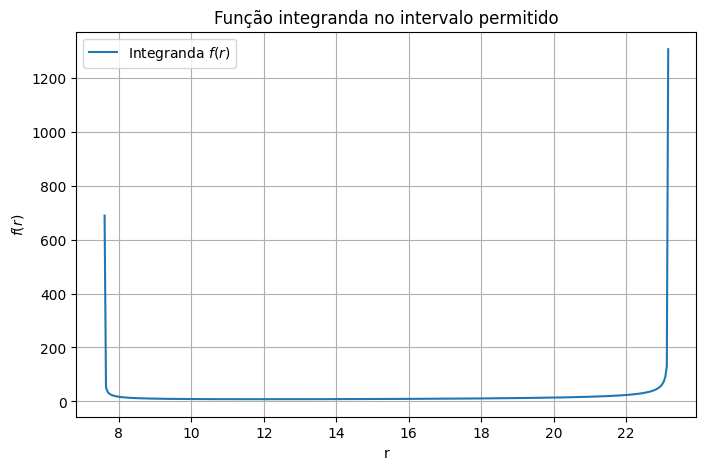

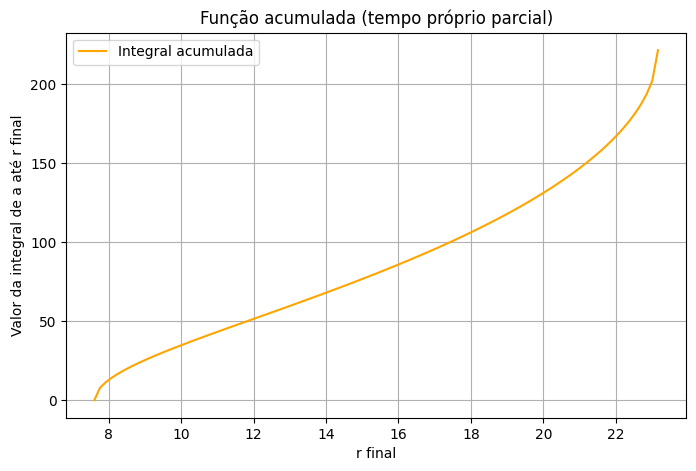

In [9]:
def V_eff(r):
    return (1 - 2*M/r) * (1 + L**2 / r**2)

def integranda(r):
    val = E**2 - V_eff(r)
    epsilon = 1e-14
    if val <= epsilon:
        return 0.0
    return 1.0 / np.sqrt(val)

#Intervalo de integração 
a = 7.605863029315147
b = 23.16124080620403

#Gráfico da função integranda
r_vals = np.linspace(a, b, 400)
f_vals = np.array([integranda(rr) for rr in r_vals])

plt.figure(figsize=(8,5))
plt.plot(r_vals, f_vals, label=r'Integranda $f(r)$')
plt.xlabel("r")
plt.ylabel(r"$f(r)$")
plt.title("Função integranda no intervalo permitido")
plt.grid(True)
plt.legend()
plt.show()

#Função acumulada (integral parcial) com Quadratura Gaussiana cumulativa 
def quadratura_gaussiana(f, a, b, n_points):
    x, w = leggauss(n_points)
    xp = 0.5*(b - a)*x + 0.5*(b + a)
    vals = np.array([f(xx) for xx in xp])
    return 0.5*(b - a) * np.sum(w * vals)

r_acum = np.linspace(a, b, 100)
integral_acum = []
for r_end in r_acum:
    if r_end == a:
        integral_acum.append(0.0)
    else:
        val = quadratura_gaussiana(integranda, a, r_end, 100)
        integral_acum.append(val)

plt.figure(figsize=(8,5))
plt.plot(r_acum, integral_acum, color='orange', label="Integral acumulada")
plt.xlabel("r final")
plt.ylabel("Valor da integral de a até r final")
plt.title("Função acumulada (tempo próprio parcial)")
plt.grid(True)
plt.legend()
plt.show()


* Gráfico da integranda:

  * Observa-se que a integranda apresenta picos muito altos próximos aos limites do intervalo ($r \approx 7.6$ e $r \approx 23.16$).
  * Esses picos correspondem aos pontos de retorno radial da partícula em órbita:

    * Nestes pontos, $E^2 - V_{\mathrm{eff}}(r) \to 0$, a velocidade radial é nula e a partícula muda de sentido (apogeu e periastro).
    * Matematicamente, a raiz quadrada no denominador da integranda tende a zero, causando o crescimento brusco da função.

  * No interior do intervalo, a integranda é suave e próxima de zero, indicando que a maior contribuição para a integral vem das regiões próximas aos extremos.

  * Do ponto de vista numérico, isso explica a necessidade de métodos de integração que lidem bem com funções mal condicionadas nas bordas.

* Gráfico da integral acumulada:

  * A curva mostra o valor acumulado da integral à medida que o limite superior $r_f$ avança de $r_{\min}$ para $r_{\max}$.
  * O crescimento é rápido no início e no final do intervalo, justamente devido aos picos da integranda, e mais suave na região intermediária.
  * Fisicamente, isso indica que a maior parte do tempo próprio gasto pela partícula no movimento radial ocorre perto dos pontos de retorno, a partícula “demora” para inverter o sentido do movimento, como esperado de um sistema gravitacional onde a energia cinética radial vai a zero na borda do movimento permitido.

* Estabilidade numérica:

  * O Romberg converge rapidamente, pois a função é suave no interior, embora apresente gradientes altos nos extremos.
  * Os picos da integranda são fenômenos físicos reais, mas exigem cuidado numérico, justificando a boa performance do método de Romberg no caso.
  * A quadratura gaussiana também é estável, mas precisa de mais pontos para atingir erro comparável.
  * Picos na integranda podem levar a erros se o refinamento for insuficiente.

### Parte reflexiva

#### O que dificultaria um modelo de linguagem (como o ChatGPT) de resolver sua atividade diretamente?

* A principal dificuldade está no fato de que o problema não é puramente numérico: ele envolve compreensão física do contexto.
* Um modelo de linguagem poderia simplesmente aplicar os métodos de integração no intervalo bruto $[r_1, r_2]$, mas isso levaria a resultados incorretos, já que a integranda não está definida onde $E^2 - V_{\mathrm{eff}}(r) \leq 0$.
* Além disso, a função escolhida pode ter singularidades removíveis, exigindo tratamento numérico específico (por exemplo, adicionar $\epsilon$ no denominador, ou redefinir os limites). Sem essa interpretação física, o modelo poderia convergir para um valor errado ou até gerar erro de execução.

#### Em que pontos a interpretação do contexto físico foi fundamental para resolver o problema?
* Identificação do intervalo fisicamente permitido: o movimento radial só ocorre quando $E^2 - V_{\mathrm{eff}}(r) > 0$. Esse critério vem da interpretação física de que a energia específica deve superar o potencial efetivo.
* Tratamento das bordas da integral: próximo aos pontos de retorno ($r_{\min}$ e $r_{\max}$), a velocidade radial da partícula vai a zero, o que se traduz matematicamente na raiz quadrada no denominador da integranda indo a zero. A interpretação física ajudou a reconhecer que esses picos não são singularidades reais, mas sim efeitos físicos que precisam de cuidado numérico.
* Escolha dos parâmetros: massa do buraco negro, momento angular e energia específica foram escolhidos de forma a representar uma órbita estável, algo que não se deduz apenas pela matemática, precisa de critério físico.

#### Houve diferença significativa entre os métodos? Qual se mostrou mais adequado ao seu caso?

* A diferença numérica final foi pequena, como já comentado, na ordem de $10^{-12}$

  * O método de Romberg atingiu boa precisão, porém com mais avaliações da função.
  * O método da Quadratura Gaussiana precisou de mais pontos para chegar a erro semelhante, mas apresentou convergência estável e previsível.


* Adequação ao caso:

  * Como a função é suave no intervalo restrito, o Romberg foi o mais eficiente.
  * A Quadratura Gaussiana é robusta, mas mais custosa para atingir a mesma precisão, ainda assim, útil quando se quer controlar explicitamente o número de pontos.